In [12]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Dimensionality_Reduction_in_Python/datasets/'
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
sales_df = pd.read_csv(path_data + 'grocery_sales.csv')

In [14]:
# exercise 01

"""
Manual feature extraction I

You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.
"""

# Instructions

"""

    Calculate the product price from the quantity sold and total revenue.
    Drop the quantity and revenue features from the dataset.

"""

# solution

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue','quantity'], axis=1)

print(reduced_df.head())

#----------------------------------#

# Conclusion

"""
Good job! When you understand the dataset well, always check if you can calculate relevant features and drop irrelevant ones.
"""

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


'\nGood job! When you understand the dataset well, always check if you can calculate relevant features and drop irrelevant ones.\n'

In [15]:
height_df = pd.read_csv(path_data + 'height_df.csv')

In [16]:
# exercise 02

"""
Manual feature extraction II

You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times: height_1, height_2, height_3. Add a feature with the mean height to the dataset, then drop the 3 original features.
"""

# Instructions

"""

    Add a feature with the mean height to the dataset. Use the .mean() method with axis=1.
    Drop the 3 original height features from the dataset.

"""

# solution

# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis = 1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

#----------------------------------#

# Conclusion

"""
Great! You've calculated a new feature that is still easy to understand compared to, for instance, principal components.
"""

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


"\nGreat! You've calculated a new feature that is still easy to understand compared to, for instance, principal components.\n"

In [17]:
ansur_df_1 = pd.read_csv(path_data + 'ANSUR_II_MALE.csv')
ansur_df_2 = pd.read_csv(path_data + 'ANSUR_II_FEMALE.csv')

ansur_df_org = pd.concat([ansur_df_1, ansur_df_2])
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Component', 'BMI_class', 'Height_class', 'Gender']

# Drop the non-numerical columns from df
ansur_df_org = ansur_df_org.drop(non_numeric, axis=1)

In [18]:
ansur_df = ansur_df_org[['stature_m', 'buttockheight','waistcircumference','shouldercircumference']]

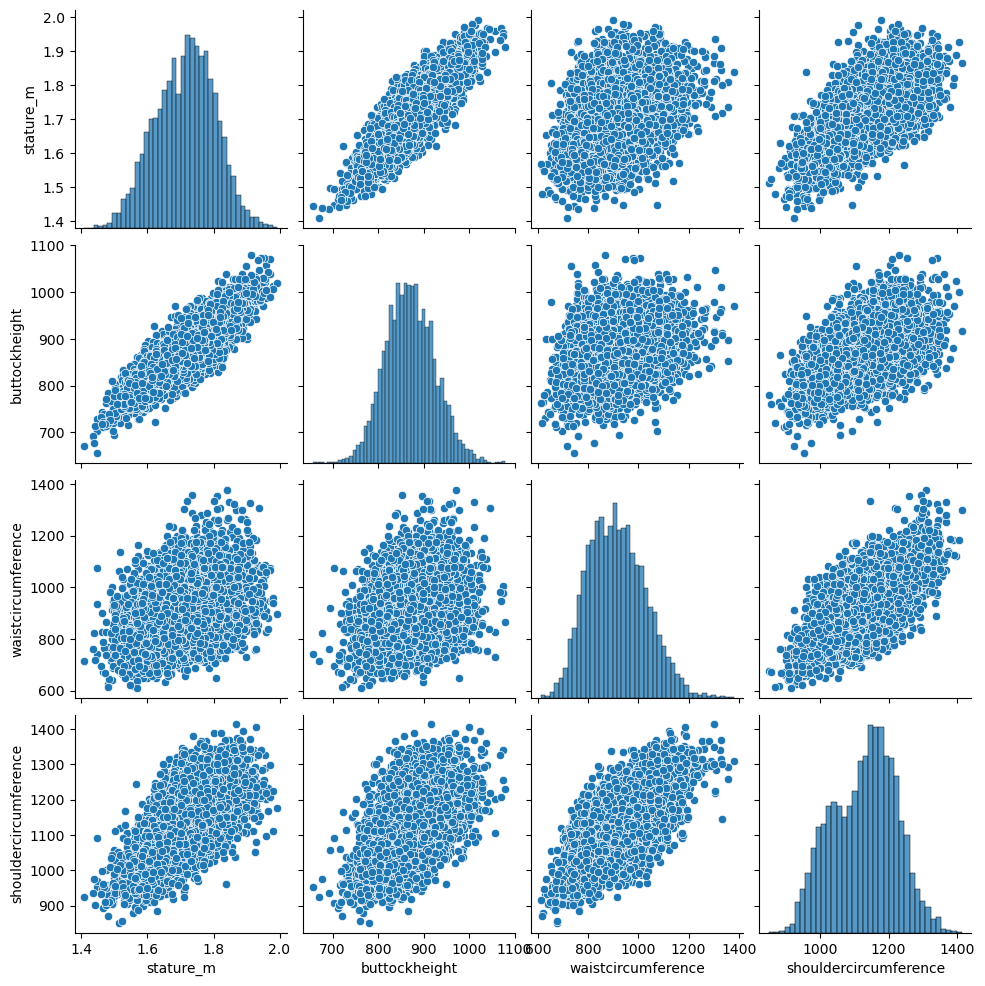

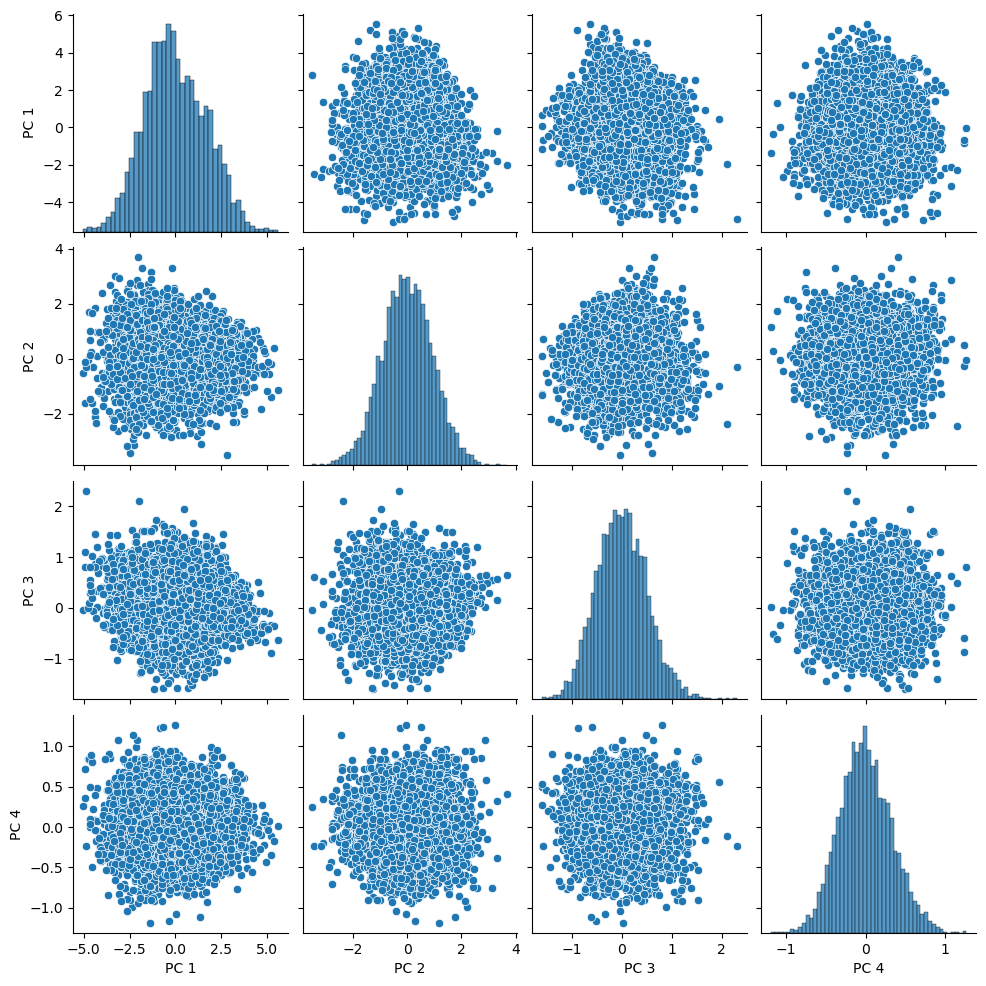

'\nGood job! Notice how, in contrast to the input features, none of the principal components are correlated to one another.\n'

In [19]:
# exercise 03

"""
Calculating Principal Components

You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df.
"""

# Instructions

"""

    Create a Seaborn pairplot to inspect ansur_df.
---

    Create the scaler and standardize the data.
---

    Create the PCA() instance and fit and transform the standardized data.
---

    Create a pairplot of the principal component DataFrame.

"""

# solution

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

#----------------------------------#

from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

#----------------------------------#

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a DataFrame
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

#----------------------------------#

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! Notice how, in contrast to the input features, none of the principal components are correlated to one another.
"""

In [20]:
ansur_df = ansur_df_org[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']]

In [21]:
# exercise 04

"""
PCA on a larger dataset

You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.
"""

# Instructions

"""

    Create the scaler.
    Standardize the data.
    Create the PCA() instance.
    Fit it to the standardized data.

"""

# solution

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

#----------------------------------#

# Conclusion

"""
Great! You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.
"""

"\nGreat! You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.\n"

In [22]:
# exercise 05

"""
PCA explained variance

You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.
"""

# Instructions

"""

    Print the explained variance ratio per principal component.
---

    How much of the variance is explained by the 4th principal component?
    ~3.7%
---

    Calculate the cumulative sum of the explained variance ratio using a method of pca.explained_variance_ratio_.
---

    What's the lowest number of principal components you should keep if you don't want to lose more than 10% of explained variance during dimensionality reduction?
    4
"""

# solution

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

#----------------------------------#

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

#----------------------------------#

# Conclusion

"""
Awesome! Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.
"""

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]
[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


'\nAwesome! Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.\n'

In [23]:
poke_df = pd.read_csv(path_data + 'pokemon_1.csv')
poke_cat_df = poke_df[['Type','Legendary']]

In [24]:
poke_df = poke_df.drop(['Name','Type','#', 'Legendary', 'Generation'], axis = 1)

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
# exercise 06

"""
Understanding the components

You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).
"""

# Instructions

"""

    Build the pipeline with the scaler and PCA, set the number of components to calculate to 2.
---

    Fit the pipeline to the poke_df dataset and extract the component vectors.
---
Question

    Inspect the PC 1 effects. Which statement is true?

"""

# solution

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(tuple(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(tuple(zip(poke_df.columns, vectors[1]))))

#----------------------------------#

# Conclusion

"""
Well done! You've used the pipeline for the first time and understand how the features relate to the components.
"""

PC 1 effects = (('Total', 0.52), ('HP', 0.33), ('Attack', 0.38), ('Defense', 0.31), ('Sp. Atk', 0.39), ('Sp. Def', 0.38), ('Speed', 0.29))
PC 2 effects = (('Total', -0.01), ('HP', 0.09), ('Attack', -0.01), ('Defense', 0.63), ('Sp. Atk', -0.3), ('Sp. Def', 0.24), ('Speed', -0.67))


"\nWell done! You've used the pipeline for the first time and understand how the features relate to the components.\n"

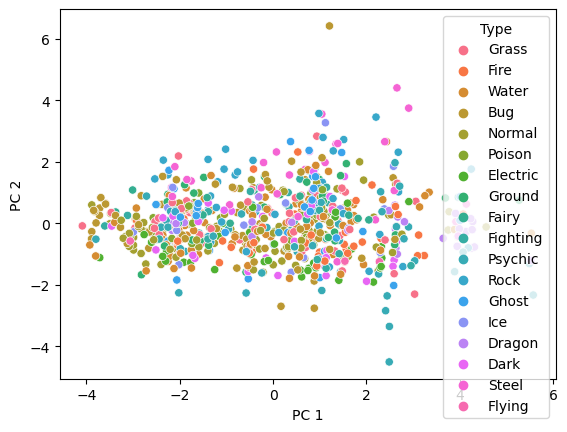

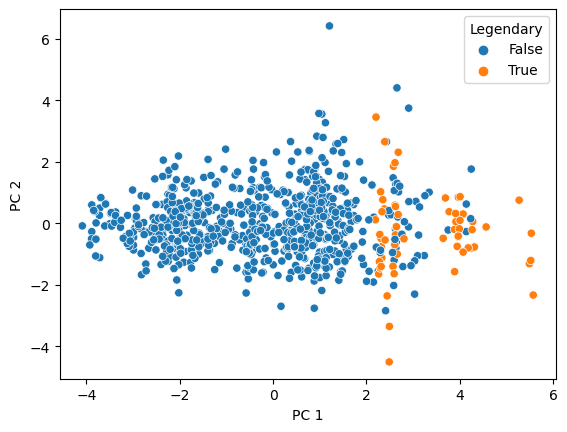

"\nAwesome! Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable nor slow and armored.\n"

In [27]:
# exercise 07

"""
PCA for feature exploration

You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate DataFrame poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())
"""

# Instructions

"""

    Fit and transform the pipeline to poke_df to extract the principal components.
---

    Add the 2 components to poke_cat_df.
---

    Use the Type feature to color the PC 1 versus PC 2 scatterplot.
---

    Use the Legendary feature to color the PC 1 versus PC 2 scatterplot.

"""

# solution

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

#----------------------------------#

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome! Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable nor slow and armored.
"""

In [28]:
poke_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = poke_df
y = poke_cat_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
# exercise 08

"""
PCA in a model pipeline

We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).
"""

# Instructions

"""
    Add a scaler, PCA limited to 2 components, and random forest classifier with random_state=0 to the pipeline.
---

    Fit the pipeline to the training data.
---

    Score the model accuracy on the test set.
---

    Repeat the process with 3 extracted components.

"""

# solution

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

#----------------------------------#

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

#----------------------------------#

# Conclusion

"""
Great! Looks like adding the third component does not increase the model accuracy, even though it adds information to the dataset.
"""

96.7% test set accuracy
[0.5369452  0.15356029 0.11428708]
95.4% test set accuracy


'\nGreat! Looks like adding the third component does not increase the model accuracy, even though it adds information to the dataset.\n'

In [31]:
# exercise 09

"""
Selecting the proportion of variance to keep

You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).
"""

# Instructions

"""

    Pipe a scaler to PCA selecting 80% of the variance.
---

    Fit the pipe to the data.
---

    Increase the proportion of variance to keep to 90%.
---

"""

# solution

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df_org)

print(f'{len(pipe["reducer"].components_)} components selected')

#----------------------------------#

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df_org)

print(f'{len(pipe["reducer"].components_)} components selected')

#----------------------------------#

# Conclusion

"""
Good job! We need to more than double the number of components to go from 80% to 90% explained variance.
"""

6 components selected
17 components selected


'\nGood job! We need to more than double the number of components to go from 80% to 90% explained variance.\n'

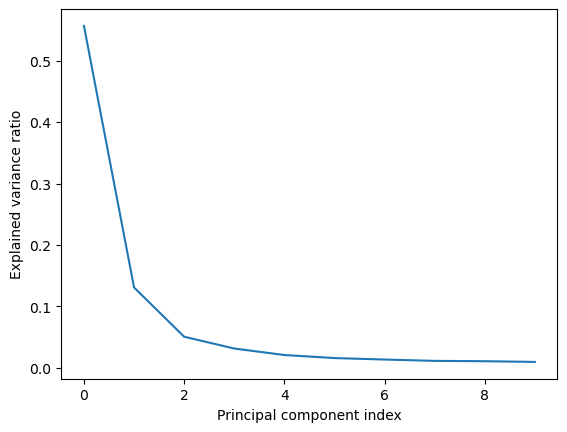

"\nCorrect! The 'elbow' in the plot is at 3 components (the 3rd component has index 2).\n"

In [32]:
# exercise 10

"""
Choosing the number of components

You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).
"""

# Instructions

"""

    Create a pipeline with a scaler and PCA selecting 10 components.
---

    Fit the pipe to the data.
---

    Plot the explained variance ratio.

"""

# solution

# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df_org)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! The 'elbow' in the plot is at 3 components (the 3rd component has index 2).
"""

In [33]:

def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

In [34]:
import os

path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Dimensionality_Reduction_in_Python/datasets/'
data_folder = os.path.join(path_data, 'ms_MINST')
os.makedirs(data_folder, exist_ok=True)

In [35]:
import gzip
import struct

# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
        if not label:
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols), dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
    return res


# note we also shrink the intensity values (X) from 0-255 to 0-1. This helps the model converge faster.
X_train = load_data(os.path.join(
    data_folder, 'train-images.gz'), False) / 255.0
X_test = load_data(os.path.join(data_folder, 'test-images.gz'), False) / 255.0
y_train = load_data(os.path.join(
    data_folder, 'train-labels.gz'), True).reshape(-1)
y_test = load_data(os.path.join(
    data_folder, 'test-labels.gz'), True).reshape(-1)

In [38]:
# instanciate and fit pipe

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=78))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=78))])

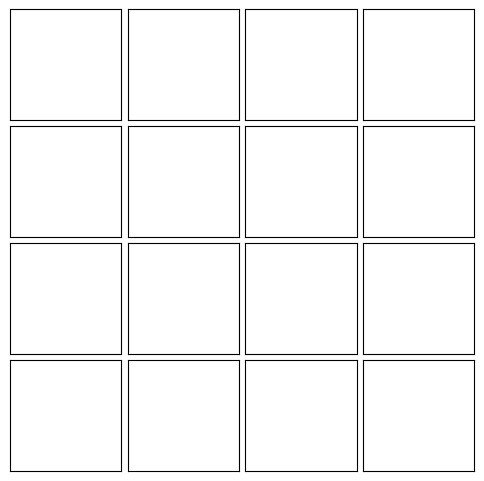

X_test has 784 features
pc has 78 features
X_rebuilt has 784 features


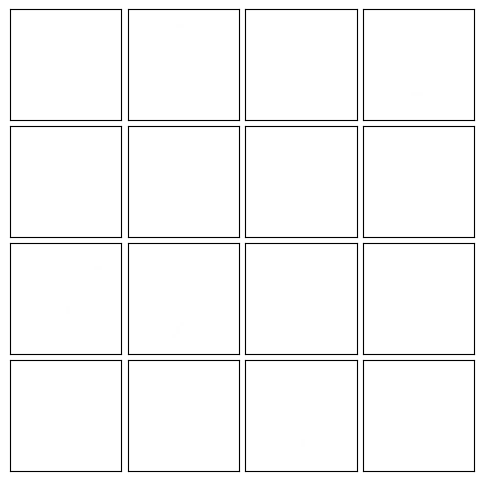

"\nAmazing! You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.\n"

In [39]:
# exercise 11

"""
PCA for image compression

You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

Finally, a function plot_digits has been created for you that will plot 16 images in a grid.
"""

# Instructions

"""

    Plot the MNIST sample data.
---

    Transform the input data to principal components using the pipeline.
---

    Inverse transform the components back to the original feature space.
---

    Plot the reconstructed data.

"""

# solution

# Plot the MNIST sample data
plot_digits(X_test)

#----------------------------------#

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print(f"X_test has {X_test.shape[1]} features")
print(f"pc has {pc.shape[1]} features")

#----------------------------------#

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print(f"X_rebuilt has {X_rebuilt.shape[1]} features")

#----------------------------------#

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

#----------------------------------#

# Conclusion

"""
Amazing! You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.
"""